In [11]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [13]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=8

In [14]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory('I:\study\dpl\project\Dataset\Train',
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )

validation_generator =  test_datagen.flow_from_directory( 'I:\study\dpl\project\Dataset\Validation',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [15]:
base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,include_top=False,weights="imagenet")

In [16]:
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout_8 (Dropout)         (None, 2, 2, 1280)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 512)         5898752   
                                                                 
 batch_normalization_5 (Batc  (None, 2, 2, 512)        2048      
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 128)        

In [17]:
model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

In [18]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = patience,
                        verbose = verbose ,
                        factor = factor,
                        min_lr = min_lr)

mcp = ModelCheckpoint('model_MNV2.h5')

es = EarlyStopping(verbose=verbose, patience=patience)

In [19]:
%time
hist = model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=steps_per_epoch,
                           validation_steps=validation_steps,
                           epochs=epochs,
                           callbacks=[lrd, mcp, es])

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\asus\AppData\Local\Temp\ipykernel_6480\2476792664.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/8
256/256 [==============================] - 720s 3s/step - loss: 0.4669 - accuracy: 0.8110 - val_loss: 0.3970 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 2/8
256/256 [==============================] - 657s 3s/step - loss: 0.2370 - accuracy: 0.9079 - val_loss: 0.4505 - val_accuracy: 0.9243 - lr: 0.0010
Epoch 3/8
256/256 [==============================] - 656s 3s/step - loss: 0.1971 - accuracy: 0.9230 - val_loss: 0.7733 - val_accuracy: 0.9209 - lr: 0.0010
Epoch 4/8
256/256 [==============================] - 661s 3s/step - loss: 0.1683 - accuracy: 0.9323 - val_loss: 0.3270 - val_accuracy: 0.9456 - lr: 0.0010
Epoch 5/8
256/256 [==============================] - 779s 3s/step - loss: 0.1717 - accuracy: 0.9338 - val_loss: 0.4164 - val_accuracy: 0.9280 - lr: 0.0010
Epoch 6/8
256/256 [==============================] - 769s 3s/step - loss: 0.1610 - accuracy: 0.9377 - val_loss: 1.0478 - val_accuracy: 0.9342 - lr: 0.0010
Epoch 7/8
256/256 [==============================] - ETA: 0s - loss: 0

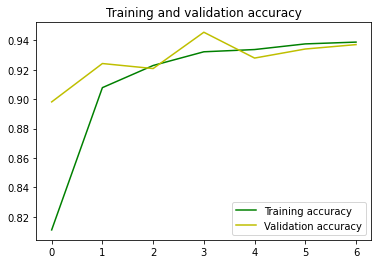

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [21]:
test_generator =  test_datagen.flow_from_directory( 'I:\study\dpl\project\Dataset\Test',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)
score = model.evaluate_generator(generator=test_generator,steps=256)

Found 20001 images belonging to 2 classes.


C:\Users\asus\AppData\Local\Temp\ipykernel_6480\123835587.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(generator=test_generator,steps=256)


In [22]:
print(score)

[0.314132958650589, 0.9383544921875]


In [3]:
import numpy as np
import matplotlib.pyplot as plt


from keras.preprocessing import image
#  images test 1
path_testmodel = "I:/study/dpl/project/Dataset/testmodel/test1.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)

X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)


images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

[0.55298305]
This is a male


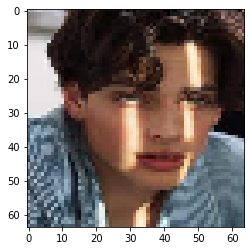

In [24]:
import numpy as np
from keras.preprocessing import image
#  images test 2
path_testmodel = "I:/study/dpl/project/Dataset/testmodel/test2.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This is a female")

plt.imshow(imge)